# AutoEncoder

In [1]:
import tensorflow.keras as k
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import numpy as np
from data_util import *

## Hyper parameters

In [2]:
input_shape = (28, 28)
hidden_unit = 128
batch_size = 128
noise_factor = 0.3
epochs = 5
num_classes = 10

## Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist()

x_train: (60000, 28, 28)
y_train: (60000, 10)
x_test: (10000, 28, 28)
y_test: (10000, 10)


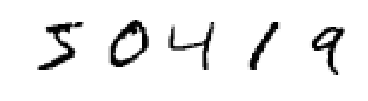

In [4]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)
show_mnist(x_train[:5])

**NOTE**: data can **not** standardization in denoising autoencoder

### Add Noise

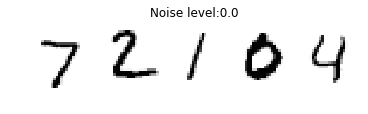

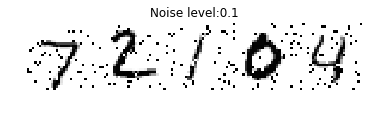

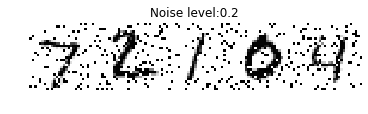

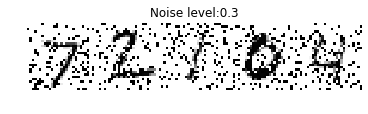

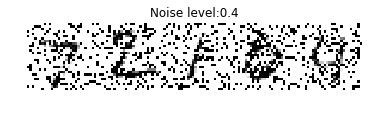

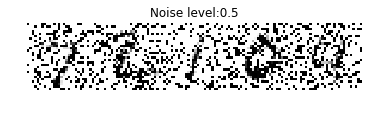

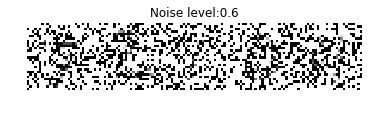

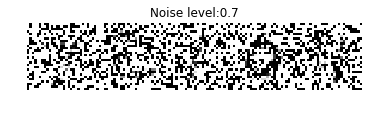

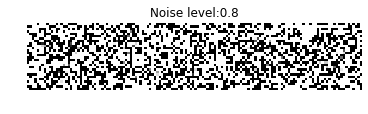

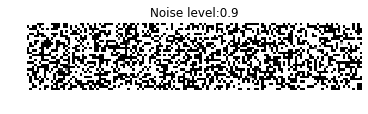

In [5]:
for level in range(10):
    noise_level = level / 10
    x_test_noise = sap_noise(x_test[:5], noise_level)
    show_mnist(x_test_noise, title = "Noise level:"+ str(noise_level))

### Generate Noise data

Generate Noise Dataset from noise_level=0.4 to noise_level=0.9

The result is going to be 5 * 60000 = 300,000 images

In [6]:
x_train_noisy = np.concatenate([sap_noise(x_train, level/10) for level in range(4,9)])

In [7]:
x_train_noisy.shape

(300000, 28, 28)

In [8]:
x_train_origin = np.concatenate([x_train for _ in range(5)])

In [9]:
x_train_origin.shape

(300000, 28, 28)

## Hyper parameters

In [10]:
input_shape = (28, 28)
hidden_unit = 256
batch_size = 128

## Model --- Denoising Autoencoder

### Encoder

In [11]:
x_input = Input(shape=input_shape, name="encode_input")
x = Flatten()(x_input)
x = Dense(hidden_unit)(x)
latent = Activation("relu")(x)
# construct model
encoder = Model(x_input, latent, name='encoder')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encode_input (InputLayer)    (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
Total params: 200,960
Trainable params: 200,960
Non-trainable params: 0
_________________________________________________________________


### Decoder

In [12]:
latent_input = Input(shape=(hidden_unit,), name = "decoder_input")
x = Dense(28*28)(latent_input)
x = Activation("sigmoid")(x)
output = Reshape(target_shape=(28,28))(x)
# construct model
decoder = Model(latent_input, output, name="decoder")
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               201488    
_________________________________________________________________
activation_1 (Activation)    (None, 784)               0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 201,488
Trainable params: 201,488
Non-trainable params: 0
_________________________________________________________________


### AutoEncoder = Encoder + Decoder

In [13]:
autoencoder = Model(x_input, decoder(encoder(x_input)), name = "autoencoder")
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encode_input (InputLayer)    (None, 28, 28)            0         
_________________________________________________________________
encoder (Model)              (None, 256)               200960    
_________________________________________________________________
decoder (Model)              (None, 28, 28)            201488    
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


### Compile and Train

In [14]:
autoencoder.compile(loss='mse', optimizer='adam')

In [25]:
autoencoder.fit(x_train_noisy, x_train_origin, batch_size=batch_size,epochs=10, shuffle=True)

Epoch 1/10
300000/300000 [==============================] - 6s 21us/step - loss: 0.0305
Epoch 2/10
300000/300000 [==============================] - 6s 20us/step - loss: 0.0305
Epoch 3/10
300000/300000 [==============================] - 6s 21us/step - loss: 0.0305
Epoch 4/10
300000/300000 [==============================] - 6s 21us/step - loss: 0.0305
Epoch 5/10
300000/300000 [==============================] - 6s 21us/step - loss: 0.0304
Epoch 6/10
300000/300000 [==============================] - 6s 21us/step - loss: 0.0304
Epoch 7/10
300000/300000 [==============================] - 6s 21us/step - loss: 0.0304
Epoch 8/10
300000/300000 [==============================] - 6s 21us/step - loss: 0.0304
Epoch 9/10
300000/300000 [==============================] - 6s 21us/step - loss: 0.0304
Epoch 10/10
300000/300000 [==============================] - 6s 21us/step - loss: 0.0304


### Save Model

In [27]:
autoencoder.save('models/dae_noise9.h5')
# encoder.save('models/dae_encoder.h5')
# decoder.save('models/dae_decoder.h5')

### Reconstruct

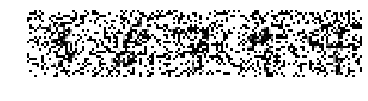

In [23]:
show_mnist(x_train_noisy[250000:250005])

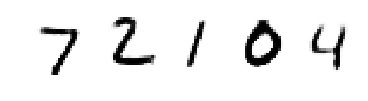

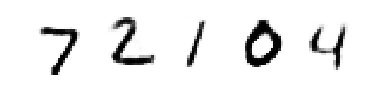

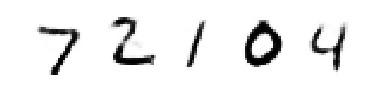

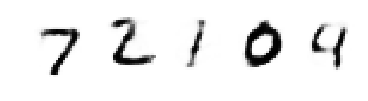

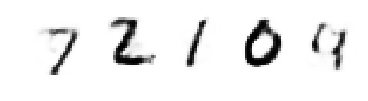

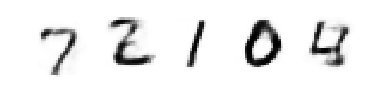

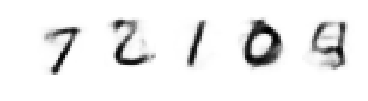

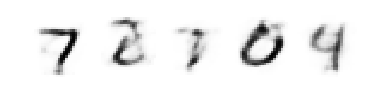

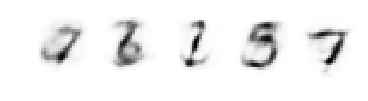

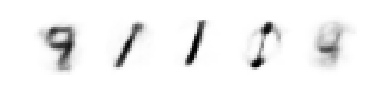

In [21]:
for i in range(10):
    noise_level = i / 10
    noisedata = sap_noise(x_test[:5], noise_level)
    decoded = autoencoder.predict(noisedata)
    show_mnist(decoded)
# decoded = autoencoder.predict(x_train_noisy[250000:250005])
# show_mnist(decoded)

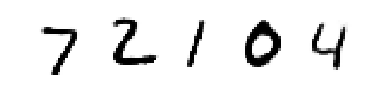

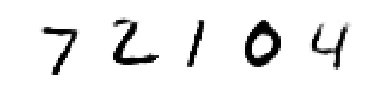

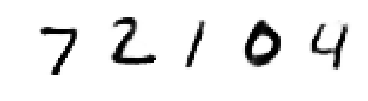

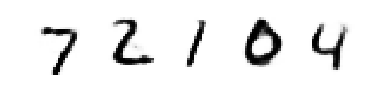

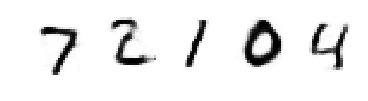

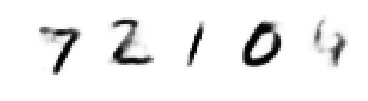

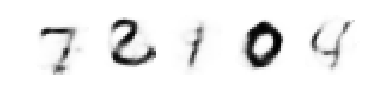

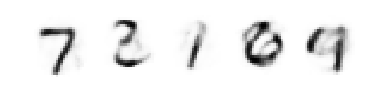

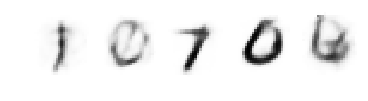

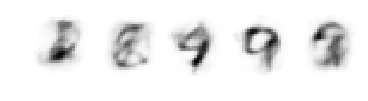

In [26]:
for i in range(10):
    noise_level = i / 10
    noisedata = sap_noise(x_test[:5], noise_level)
    decoded = autoencoder.predict(noisedata)
    show_mnist(decoded)
# decoded = autoencoder.predict(x_train_noisy[250000:250005])
# show_mnist(decoded)

In [19]:
autoencoder_origin = k.models.load_model("models/dae.h5")

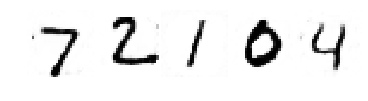

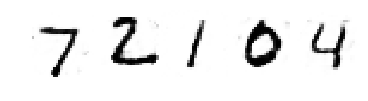

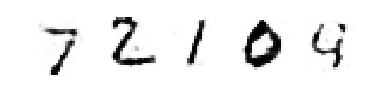

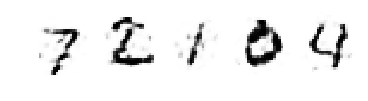

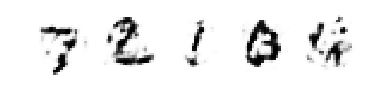

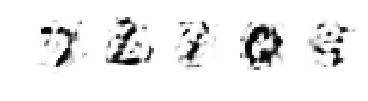

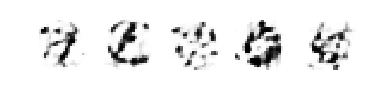

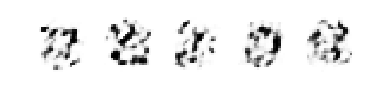

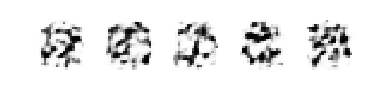

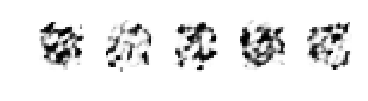

In [20]:
for i in range(10):
    noise_level = i / 10
    noisedata = sap_noise(x_test[:5], noise_level)
    decoded = autoencoder_origin.predict(noisedata)
    show_mnist(decoded)